# Analizando e Desenvolvendo Algoritmos: Fundamentos, Dados e Sugestões
Neste notebook, você ampliará seus conhecimentos em desenvolvimento de algoritmos. Aprenderá sobre os impactos das escolhas de linguagens de programação, análise de recorrência e poderá interagir com um modelo de linguagem natural para analizar seu código, propondo melhorias.
A estrutura do projeto visa diminuir impactos no uso de processamento, promovendo um uso mais sustentável desde à concepção do projeto. 

Na primeira sessão, você irá ser introduzido a conceitos de desenvolvimento de algoritmos eficientes, assim como sugestão de conteúdo pelos autores deste notebook para ampliar seu conhecimento no assunto. A maior parte dos seus esforços nesta tragetória de desenvolvimento de software está nesta sessão, seu tempo deve ser investido aqui.

Na segunda sessão, você poderá fazer uma análise quantitativa do seu algoritmo rodando em diferentes linguagens de programação ou dois algoritmos diferentes rodando em uma mesma linguagem. Depois de enviar seus dois programas ao notebook, uma análise detalhada, com benchmarks de tempo, consumo de CPU/memória, relacionando à impactos sustentáveis serão plotados em gráficos. Com esses dados, você poderá ter insights significativos sobre seu código e se ele é sustentável ou não.

Por fim, na terceira sessão, você poderá enviar seu código a um modelo de Linguagem Natural, que avaliará os benchmarks de sustentabilidade do seu código e proporá mudanças especificas para seu contexto. Dessa forma, você terá mais informações para melhorar seu código e se tornar um melhor programador!
Vamos começar?

### Nível Básico: Compreendendo a Complexidade de Tempo
![Imagem principal](https://miro.medium.com/max/1400/1*j8fUQjaUlmrQEN_udU0_TQ.jpeg)


**Complexidade de Tempo e Complexidade de Espaço – GeeksforGeeks**

Para criar algoritimos eficientes, é importante entender como medir o tempo que um programa leva para rodar. Este material explica, de forma simples, como calcular o número de execuções que um algoritmo faz e como isso afeta o desempenho do programa.

https://www.geeksforgeeks.org/time-complexity-and-space-complexity/


**Compreendendo a Complexidade de Tempo com Exemplos Simples – GeeksforGeeks**

Nem todos os algoritmos funcionam na mesma velocidade. Alguns resolvem problemas rapidamente, enquanto outros demoram mais em função do tamanho da entrada. Este conteúdo usa exemplos práticos para mostrar os diferentes tipos de crescimento do tempo de execução e como prever o desempenho de um algoritmo.
https://www.geeksforgeeks.org/understanding-time-complexity-simple-examples/

### Nível Intermediário: Boas Práticas no Desenvolvimento de Algoritmos

![Imagem](https://lh5.googleusercontent.com/proxy/4NkOeom5Za2qQmQRUrq6MoGtkEyytr5qCKKaSDp-vdjvg-abq518nGxyPqc2Sblz5R0PISDxDROxEFaxMLMVD5v0l2KLFOr6v_5NnsyHV7jfB2w)


**Entendendo a Análise de Algoritmos: Explorando Complexidade de Tempo e Espaço – Artigo no Medium**

Agora que você já sabe que diferentes algoritmos podem levar mais ou menos tempo para rodar, este material ensina como avaliar o desempenho de um código na prática. Ele também traz dicas sobre erros comuns e boas práticas para escrever algoritmos eficientes.

https://medium.com/javarevisited/algorithm-tutorial-day-2-understanding-algorithm-analysis-exploring-time-and-space-complexity-319014d796ad


**Complexidade de Tempo e Espaço em Estruturas de Dados – Simplilearn**

Para criar suas aplicações, você precisará dominar diferentes estruturas de dados. Mas como escolhê-las? Aqui, você aprende como os diferentes tipos de armazenamento influenciam o tempo de execução de um algoritmo e como tomar melhores decisões na hora de programar.

https://www.simplilearn.com/tutorials/data-structure-tutorial/time-and-space-complexity



### Nível Avançado: Resolvendo Recorrências e Projeção Formal de Eficiência


**Teorema Mestre: Dividir, Conquistar e Juntar!**

No nível avançado, você precisa de ferramentas para projetar matematicamente (ou seja, de forma formal) a eficiência de um algoritmo. Neste link, você aprenderá sobre o Teorema Mestre, um método para resolver recorrências de divisão e conquista, com exemplos.

https://www.youtube.com/watch?v=d-gIGFxewW4



**Relações de Recorrência: Descrevendo Eficiência e Otimização**

Complementando o Teorema Mestre, este material aprofunda o estudo das relações de recorrência. Ele mostra como modelar a complexidade de tempo de algoritmos recursivos e discute substituição iterativa, métodos de árvore e até mesmo funções geradoras para recorrências.

https://www.youtube.com/watch?v=eAaP4XaB8hM

# Análise de desemepenho

Nesta seção, iremos analisar o desemepenho de alguns algoritmos de ordenação - BubbleSort, MergeSort e QuickSort - implementados em linguagens diferentes (C, Java - compiladas - e Python - interpretada), e algumas implementações diferentes na mesma linguagem, a fim de extrair dados referentes a uso de CPU e memória, e tempo de execução. Esses dados serão exibidos em forma de gráficos e tabelas, possibilitando uma melhor visualização das diferenças entre as abordagens adotadas. No final da seção também será possível fornecer seus próprios códigos para análise.


### Configurando o ambiente

Para coletar as métricas e realizar a análise de desempenho precisamos instalar alguns pacotes que irão nos auxiliar nesse processo. São eles: psutil (para monitoramento de CPU e memória), matplotlib (para plotar gráficos a partir dos dados coletados) e pandas (para organização dos dados em tabelas).

Para isso, execute o comando abaixo:

In [3]:
#!pip install --upgrade psutil matplotlib pandas

#### **Extração do zip com os códigos base dos algoritmos de ordenação**

In [ ]:
import zipfile
import os

with zipfile.ZipFile('/kaggle/input/codigosBase.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

# List the contents to verify
#os.listdir('./')


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/codigosBase.zip'

#### **Compilar arquivos base em C e Java**

Como Python é uma linguagem interpretada, não é necessário realizar essa etapa de compilação prévia para seus códigos fonte.

In [32]:
import os
import subprocess

# Diretório base onde os códigos foram extraídos
base_dir = './'

# Compilando código C
# BubbleSort
c_bubblesort_source = os.path.join(base_dir, 'C', 'BubbleSort.c')
c_bubblesort_executable = os.path.join(base_dir, 'C', 'bubblesort_exec')
compile_c_bubblesort_cmd = f"gcc -O3 {c_bubblesort_source} -o {c_bubblesort_executable}"

subprocess.run(compile_c_bubblesort_cmd, shell=True, check=True)

# MergeSort
c_mergesort_source = os.path.join(base_dir, 'C', 'MergeSort.c')
c_mergesort_executable = os.path.join(base_dir, 'C', 'mergesort_exec')
compile_c_mergesort_cmd = f"gcc -O3 {c_mergesort_source} -o {c_mergesort_executable}"

subprocess.run(compile_c_mergesort_cmd, shell=True, check=True)

# QuickSort
c_quicksort_source = os.path.join(base_dir, 'C', 'QuickSort.c')
c_quicksort_executable = os.path.join(base_dir, 'C', 'quicksort_exec')
compile_c_quicksort_cmd = f"gcc -O3 {c_quicksort_source} -o {c_quicksort_executable}"

subprocess.run(compile_c_quicksort_cmd, shell=True, check=True)

# Compilando código Java
# BubbleSort
java_bubblesort_source = os.path.join(base_dir, 'Java', 'BubbleSort.java')
compile_java_bubblesort_cmd = f"javac {java_bubblesort_source} -d {os.path.join(base_dir, 'Java')}"

subprocess.run(compile_java_bubblesort_cmd, shell=True, check=True)

# MergeSort
java_mergesort_source = os.path.join(base_dir, 'Java', 'MergeSort.java')
compile_java_mergesort_cmd = f"javac {java_mergesort_source} -d {os.path.join(base_dir, 'Java')}"

subprocess.run(compile_java_mergesort_cmd, shell=True, check=True)

# QuickSort
java_quicksort_source = os.path.join(base_dir, 'Java', 'QuickSort.java')
compile_java_quicksort_cmd = f"javac {java_quicksort_source} -d {os.path.join(base_dir, 'Java')}"

subprocess.run(compile_java_quicksort_cmd, shell=True, check=True)

# Para Python, não é necessária compilação

CompletedProcess(args='javac ./Java\\QuickSort.java -d ./Java', returncode=0)

#### **Definir funções de benchmark**

A partir dos arquivos compilados de C e Java, além dos arquivos fonte em Python, iremos criar uma função de benchmark que executa esses algoritmos um determinado número de vezes e coleta as métricas de interesse para esse projeto.

In [2]:
import psutil
import time
import subprocess
import threading
import numpy as np

def calculate_sustainability(
    benchmark_results, 
    input_size_elements,
    tdp_w=15,                # Intel i5-8250U TDP (15W)
    memory_power_w=3,         # 8GB DDR4 RAM power
    carbon_intensity=70,      # Brazil: 70 gCO₂/kWh
    water_intensity=1.8       # Brazil: 1.8 L/kWh (hydropower)
):
    """
    Calculate sustainability metrics from benchmark results.
    """
    # Calculate averages
    avg_time = np.mean(benchmark_results["tempo_execucao"])
    avg_cpu_util = np.mean(benchmark_results["pico_cpu"])
    avg_mem_usage = np.mean(benchmark_results["pico_memoria_MB"])
    
    # CPU power (account for multi-core usage)
    cpu_power = tdp_w * (avg_cpu_util / 100)  # 100% = 1 core
    total_power = cpu_power + memory_power_w
    
    # Energy consumption (kWh)
    energy_kwh = (total_power * avg_time / 3600) / 1000
    
    # CO₂ emissions (g)
    co2_g = energy_kwh * carbon_intensity
    
    # Water usage (L)
    water_l = energy_kwh * water_intensity
    
    # Energy Delay Product (kWh·s)
    edp = energy_kwh * avg_time
    
    # Memory efficiency (MB processed per kWh)
    input_size_mb = (input_size_elements * 4) / (1024 ** 2)  # 4 bytes per integer
    memory_efficiency = input_size_mb / energy_kwh if energy_kwh != 0 else 0
    
    return {
        "energy_kwh": energy_kwh,
        "co2_emissions_grams": co2_g,
        "water_usage_liters": water_l,
        "edp_kwh_sec": edp,
        "memory_efficiency_mb_per_kwh": memory_efficiency
    }

def benchmark_c(executable_path, input_data, runs=5, sample_interval=0.01):
    """
    Executa o executável C especificado e mede o desempenho com os dados de entrada fornecidos.
    """
    cmd = [executable_path]
    return benchmark_command(cmd, input_data, runs, sample_interval)


def benchmark_java(executable, input_data):
    """Runs the Java sorting program and collects performance metrics."""
    start_time = time.time()

    results = {
        "tempo_execucao": [],
        "pico_cpu": [],
        "pico_memoria_MB": [],
        "media_cpu": [],
        "media_memoria_MB": []
    }

    for run in range(5):  
        print(f"Executando '{executable}' - run {run+1} de 5")
        command = ["java", executable]

        process = subprocess.Popen(
            command, 
            stdin=subprocess.PIPE, 
            stdout=subprocess.PIPE, 
            stderr=subprocess.PIPE,
            text=True
        )

        pid = process.pid  

        # Monitor peak CPU and memory usage
        peak_cpu = 0.0
        peak_memory = 0.0
        total_cpu = 0.0
        total_memory = 0.0
        sample_count = 0

        while process.poll() is None:
            try:
                proc = psutil.Process(pid)
                cpu = proc.cpu_percent(interval=0.01)
                memory = proc.memory_info().rss / (1024 * 1024)  # Convert to MB

                peak_cpu = max(peak_cpu, cpu)
                peak_memory = max(peak_memory, memory)

                total_cpu += cpu
                total_memory += memory
                sample_count += 1

            except psutil.NoSuchProcess:
                break  

        avg_cpu = total_cpu / sample_count if sample_count > 0 else 0
        avg_memory = total_memory / sample_count if sample_count > 0 else 0

        stdout, stderr = process.communicate(input=input_data)
        end_time = time.time()

        execution_time = end_time - start_time

        # Store results
        results["tempo_execucao"].append(execution_time)
        results["pico_cpu"].append(peak_cpu)
        results["pico_memoria_MB"].append(peak_memory)
        results["media_cpu"].append(avg_cpu)
        results["media_memoria_MB"].append(avg_memory)

    return results

def benchmark_python(executable, input_data, num_executions=5):
    """Executes a Python sorting algorithm multiple times and captures performance metrics."""

    results = {
        "tempo_execucao": [],
        "pico_cpu": [],
        "pico_memoria_MB": [],
        "media_cpu": [],
        "media_memoria_MB": []
    }

    for run in range(num_executions):  
        start_time = time.time()
        print(f"Executando '{executable}' - run {run+1} de {num_executions}")
        command = ["python", executable]

        process = subprocess.Popen(
            command, 
            stdin=subprocess.PIPE, 
            stdout=subprocess.PIPE, 
            stderr=subprocess.PIPE,
            text=True
        )

        peak_cpu = 0.0
        peak_memory = 0.0
        total_cpu = 0.0
        total_memory = 0.0
        num_samples = 0

        def monitor_peaks():
            nonlocal peak_cpu, peak_memory, total_cpu, total_memory, num_samples
            child_pid = process.pid
            try:
                proc = psutil.Process(child_pid)
            except psutil.NoSuchProcess:
                return  # Process already exited
            while True:
                if process.poll() is not None:
                    break  # Process has exited
                try:
                    cpu = proc.cpu_percent(interval=0.01)
                    memory = proc.memory_info().rss / (1024 * 1024)  # Convert to MB
                    peak_cpu = max(peak_cpu, cpu)
                    peak_memory = max(peak_memory, memory)
                    total_cpu += cpu
                    total_memory += memory
                    num_samples += 1
                except (psutil.NoSuchProcess, psutil.AccessDenied):
                    break
                time.sleep(0.01)

        # Start monitoring in a separate thread
        monitor_thread = threading.Thread(target=monitor_peaks)
        monitor_thread.start()

        try:
            # Send input data and wait for process completion
            stdout, stderr = process.communicate(input=input_data, timeout=30)
        except subprocess.TimeoutExpired:
            process.kill()
            stdout, stderr = process.communicate()
            print(f"Process {executable} timed out!")
        finally:
            monitor_thread.join()

        end_time = time.time()
        execution_time = end_time - start_time

        avg_cpu = total_cpu / num_samples if num_samples > 0 else 0.0
        avg_memory = total_memory / num_samples if num_samples > 0 else 0.0

        results["tempo_execucao"].append(execution_time)
        results["pico_cpu"].append(peak_cpu)
        results["pico_memoria_MB"].append(peak_memory)
        results["media_cpu"].append(avg_cpu)
        results["media_memoria_MB"].append(avg_memory)
        

        if process.returncode != 0:
            print(f"Error in '{executable}': {stderr}")

    return results

def benchmark_command(cmd, input_data, runs=5, sample_interval=0.01):
    """
    Executa o comando `cmd`, passa `input_data` via stdin e coleta métricas:
      - Tempo de execução total (s)
      - Pico de uso de CPU (%)
      - Pico de uso de memória (em MB)
    
    Parâmetros:
      - cmd: string com o comando a ser executado (ex.: "python3 /kaggle/working/codeBase/Python/quicksort.py")
      - input_data: string com os dados que serão passados via stdin para o processo.
      - runs: número de execuções
      - sample_interval: intervalo entre as amostragens (em segundos)
      
    Retorna:
      - Um dicionário com listas de 'tempo_execucao', 'pico_cpu' e 'pico_memoria_MB'
    """
    tempos_exec = []
    picos_cpu = []
    picos_mem = []
    medias_cpu = []
    medias_mem = []
    
    for run in range(runs):
        print(f"Executando '{cmd}' - run {run+1} de {runs}")
        start_time = time.time()
        # Inicia o processo
        proc = psutil.Popen(cmd, stdin=subprocess.PIPE, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)

        # Escreve os dados de entrada e fecha o stdin
        try:
            proc.stdin.write(input_data)
            proc.stdin.close()
        except (BrokenPipeError, IOError):
            pass  # Processo pode ter terminado prematuramente
        
        cpu_samples = []
        mem_samples = []
        
        # Monitora enquanto o processo está ativo
        while proc.poll() is None:
            try:
                # Obtém uso de CPU com intervalo de amostragem
                cpu = proc.cpu_percent(interval=sample_interval)
                cpu_samples.append(cpu)
                # Obtém uso de memória
                mem = proc.memory_info().rss / (1024 * 1024)  # MB
                mem_samples.append(mem)
            except psutil.NoSuchProcess:
                break
        
        proc.wait()
        end_time = time.time()
        exec_time = end_time - start_time
        
        # Registra os picos
        tempos_exec.append(exec_time)
        picos_cpu.append(max(cpu_samples) if cpu_samples else 0)
        picos_mem.append(max(mem_samples) if mem_samples else 0)
        medias_cpu.append(sum(cpu_samples) / len(cpu_samples) if cpu_samples else 0)
        medias_mem.append(sum(mem_samples) / len(mem_samples) if mem_samples else 0)
    
    return {
        'tempo_execucao': tempos_exec,
        'pico_cpu': picos_cpu,
        'pico_memoria_MB': picos_mem,
        'media_cpu': medias_cpu,
        'media_memoria_MB': medias_mem
}

In [3]:
import random

# Generate a list of 1000 random integers between 1 and 10000
numbers = [str(random.randint(1, 50000)) for _ in range(10000)]
input_data = "\n".join(numbers)
print(input_data)  # Optionally, print to verify the input

22304
10276
46735
47471
19845
24848
42902
39342
34478
10881
20569
32087
29417
7748
14702
29289
16120
4175
23727
47850
10537
23491
31902
31658
16264
23854
28963
27363
22409
12079
13528
36365
28668
24085
28135
13385
1400
17648
2762
6193
3541
19999
21816
7476
4462
37955
45232
13810
22583
45668
49627
26060
3947
29216
46039
22219
334
2876
35217
3588
5036
9341
17214
29595
14386
11838
2699
33951
49905
45263
13242
35834
27139
39182
18342
43003
28665
13608
11548
49372
5882
4300
5030
17013
31236
13521
22994
14801
11047
17690
49569
7036
46575
37190
28721
26831
23717
22199
177
41561
44819
10611
48673
5730
2458
42155
38793
27160
7320
22597
28945
31522
27349
39991
21450
31214
22860
16392
43521
6839
11268
48089
22214
42429
44638
32344
9589
35960
41563
26915
32686
32831
34118
37853
25660
43049
30620
3757
31033
6357
22394
49777
10374
14412
10907
20526
42685
27252
37085
48870
25649
21674
11871
45879
2251
25073
39489
36241
2546
11694
45848
19648
34818
15502
27465
12655
3067
9353
12019
4023
49837
49288
42

In [10]:
import json
import os

# Dicionário para mapear algoritmos e linguagens aos seus respectivos executáveis/scripts
executables = {
    'C': {
        'BubbleSort': './C/bubblesort_exec.exe',
        'MergeSort': './C/mergesort_exec.exe',
        'QuickSort': './C/quicksort_exec.exe'
    },
    'Java': {
        'BubbleSort': './Java/BubbleSort',  # Nome da classe principal
        'MergeSort': './Java/MergeSort',
        'QuickSort': './Java/QuickSort'
    },
    'Python': {
        'BubbleSort': './Python/BubbleSort.py',
        'MergeSort': './Python/MergeSort.py',
        'QuickSort': './Python/QuickSort.py'
    }
}

# Exemplo de uso corrigido
def run_benchmark(language, executable, input_data):
    if language == 'C':
        return benchmark_c(executable, input_data)
    elif language == 'Java':
        return benchmark_java(executable, input_data)
    elif language == 'Python':
        return benchmark_python(executable, input_data)
    else:
        raise ValueError("Linguagem não suportada")

INPUT_SIZE_ELEMENTS = 10000

# Executando os benchmarks
resultados = {}
for lang in ["C", "Java", "Python"]:
    resultados[lang] = {}
    for algo in ["BubbleSort", "MergeSort", "QuickSort"]:
        # Get the executable path from the dictionary
        executable_path = executables[lang][algo]
        
        # Run the benchmark
        benchmark_result = run_benchmark(lang, executable_path, input_data)
        
        # Calculate sustainability metrics
        sustainability = calculate_sustainability(
            benchmark_result, 
            input_size_elements=INPUT_SIZE_ELEMENTS
        )
        
        # Add sustainability metrics to the results
        benchmark_result.update(sustainability)
        resultados[lang][algo] = benchmark_result

# Save the resultados dictionary to a JSON file
output_file = "./resultados.json"  # Path to the output file
with open(output_file, "w") as f:
    json.dump(resultados, f, indent=4)  # indent=4 makes the file human-readable

Executando '['./C/bubblesort_exec.exe']' - run 1 de 5
Executando '['./C/bubblesort_exec.exe']' - run 2 de 5
Executando '['./C/bubblesort_exec.exe']' - run 3 de 5
Executando '['./C/bubblesort_exec.exe']' - run 4 de 5
Executando '['./C/bubblesort_exec.exe']' - run 5 de 5
Executando '['./C/mergesort_exec.exe']' - run 1 de 5
Executando '['./C/mergesort_exec.exe']' - run 2 de 5
Executando '['./C/mergesort_exec.exe']' - run 3 de 5
Executando '['./C/mergesort_exec.exe']' - run 4 de 5
Executando '['./C/mergesort_exec.exe']' - run 5 de 5
Executando '['./C/quicksort_exec.exe']' - run 1 de 5
Executando '['./C/quicksort_exec.exe']' - run 2 de 5
Executando '['./C/quicksort_exec.exe']' - run 3 de 5
Executando '['./C/quicksort_exec.exe']' - run 4 de 5
Executando '['./C/quicksort_exec.exe']' - run 5 de 5
Executando './Java/BubbleSort' - run 1 de 5
Executando './Java/BubbleSort' - run 2 de 5
Executando './Java/BubbleSort' - run 3 de 5
Executando './Java/BubbleSort' - run 4 de 5
Executando './Java/Bubbl

In [1]:
!pip install --upgrade psutil matplotlib pandas numpy

You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.


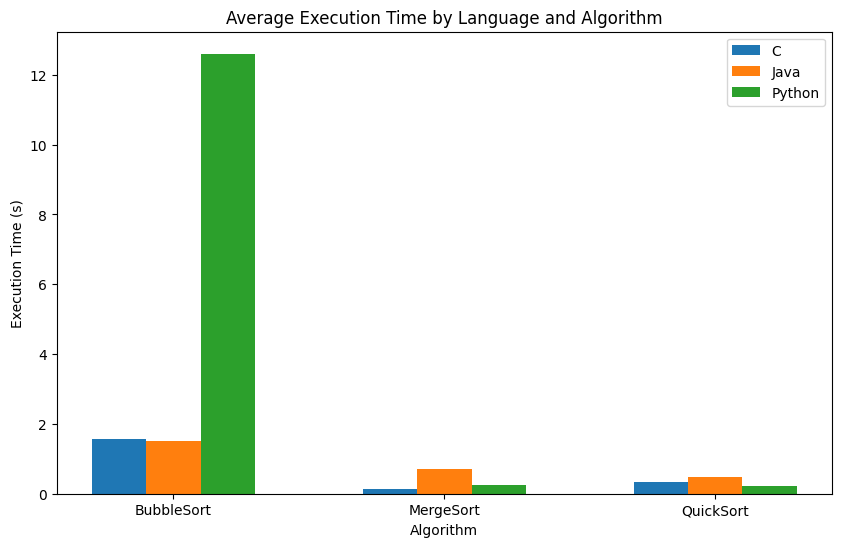

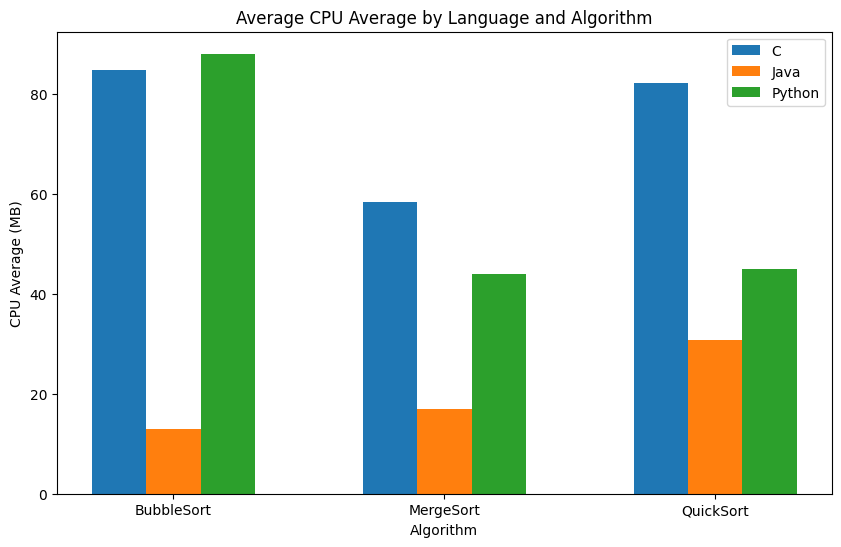

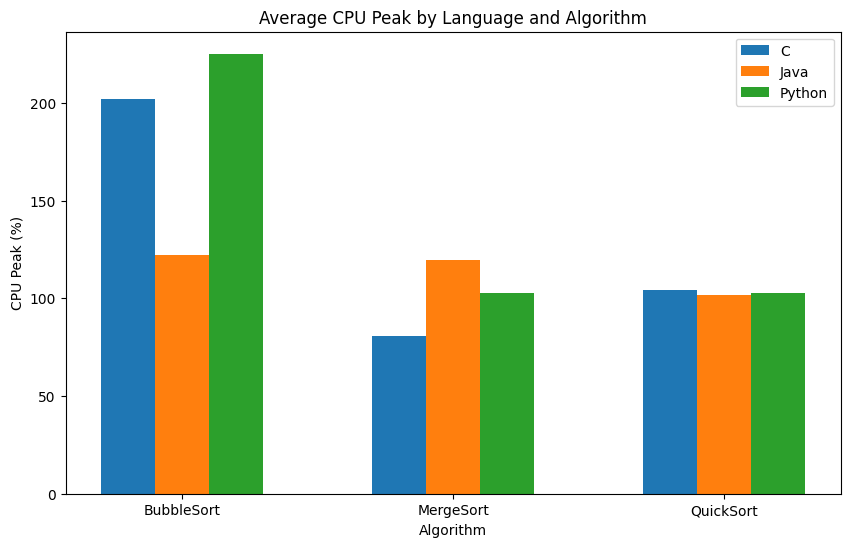

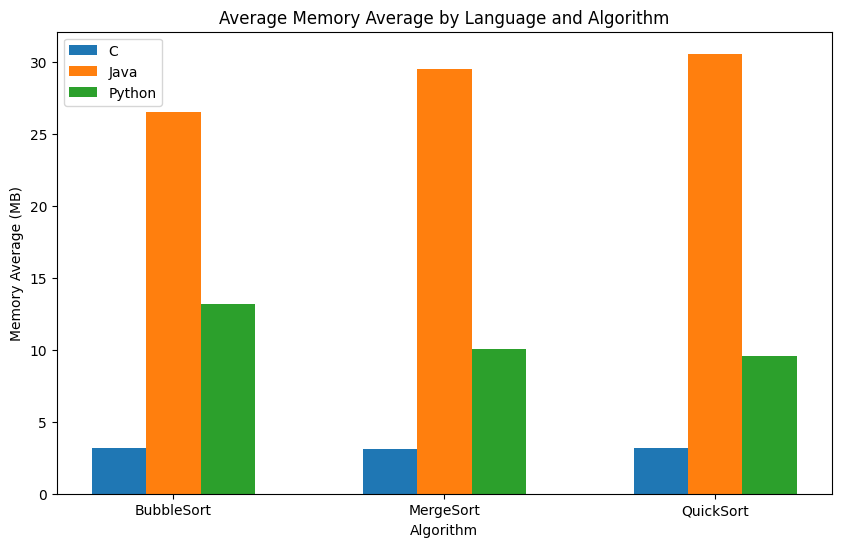

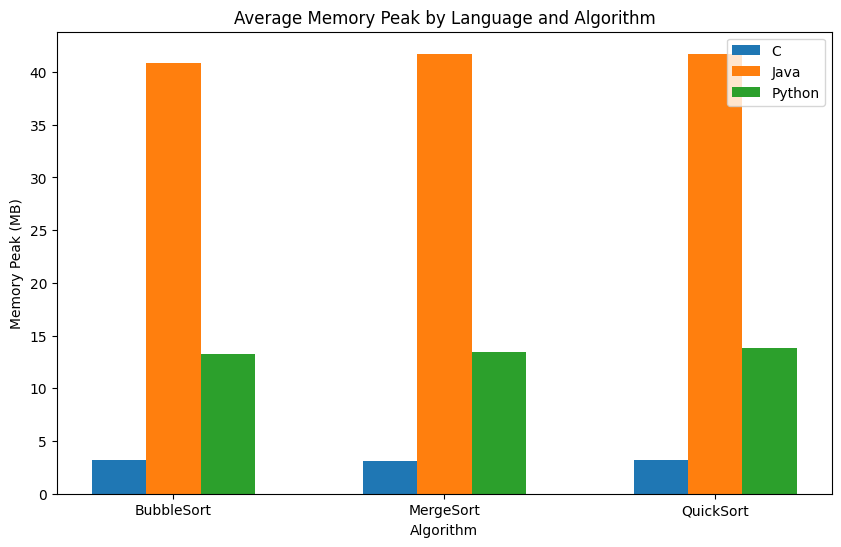

In [11]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Load the JSON data from the file
with open("./resultados.json", "r") as file:
    results = json.load(file)

# Step 2: Calculate averages
def calculate_average(values):
    return np.average(values)

metrics = {
    "execution_time": {},
    "cpu_peak": {},
    "memory_peak": {},
    "cpu_avg": {},
    "memory_avg": {},
    "co2_emissions": {},
    "water_usage": {},
    "edp": {},
    "memory_efficiency": {}
}

input_size_elements = 10000  # REPLACE WITH YOUR ACTUAL INPUT SIZE

for language, algorithms in results.items():
    for algorithm, values in algorithms.items():
        if language not in metrics["execution_time"]:
            metrics["execution_time"][language] = {}
            metrics["cpu_peak"][language] = {}
            metrics["memory_peak"][language] = {}
            metrics["cpu_avg"][language] = {}
            metrics["memory_avg"][language] = {}
            # Add sustainability keys if needed
            metrics["co2_emissions"][language] = {}
            metrics["water_usage"][language] = {}
            metrics["edp"][language] = {}
            metrics["memory_efficiency"][language] = {}

        # Existing averages
        metrics["execution_time"][language][algorithm] = calculate_average(values["tempo_execucao"])
        metrics["cpu_peak"][language][algorithm] = calculate_average(values["pico_cpu"])
        metrics["memory_peak"][language][algorithm] = calculate_average(values["pico_memoria_MB"])
        metrics["cpu_avg"][language][algorithm] = calculate_average(values["media_cpu"])
        metrics["memory_avg"][language][algorithm] = calculate_average(values["media_memoria_MB"])
        
        # New sustainability metrics
        sustainability = calculate_sustainability(
            values, 
            input_size_elements=input_size_elements
        )
        metrics["co2_emissions"][language][algorithm] = calculate_average(values["co2_emissions_grams"])
        metrics["water_usage"][language][algorithm] = calculate_average(values["water_usage_liters"])
        metrics["edp"][language][algorithm] = calculate_average(values["edp_kwh_sec"])
        metrics["memory_efficiency"][language][algorithm] = calculate_average(values["memory_efficiency_mb_per_kwh"])

# Step 3: Plot the Results
def plot_bar_chart(data, title, ylabel):
    languages = list(data.keys())
    algorithms = list(data[languages[0]].keys())

    x = np.arange(len(algorithms))  # the label locations
    width = 0.2  # the width of the bars

    fig, ax = plt.subplots(figsize=(10, 6))
    for i, language in enumerate(languages):
        averages = [data[language][alg] for alg in algorithms]
        ax.bar(x + i * width, averages, width, label=language)

    # Add labels, title, and legend
    ax.set_xlabel("Algorithm")
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x + width)
    ax.set_xticklabels(algorithms)
    ax.legend()

    plt.show()

# Plot execution time
plot_bar_chart(metrics["execution_time"], "Average Execution Time by Language and Algorithm", "Execution Time (s)")

plot_bar_chart(metrics["cpu_avg"], "Average CPU Average by Language and Algorithm", "CPU Average (MB)")

# Plot CPU peak
plot_bar_chart(metrics["cpu_peak"], "Average CPU Peak by Language and Algorithm", "CPU Peak (%)")

plot_bar_chart(metrics["memory_avg"], "Average Memory Average by Language and Algorithm", "Memory Average (MB)")
# Plot memory peak
plot_bar_chart(metrics["memory_peak"], "Average Memory Peak by Language and Algorithm", "Memory Peak (MB)")

#### **Métricas sustentáveis**

TODO TEXT

a. Measure Energy Consumption
- Metric: Energy consumed by the algorithm (in kWh).
- Formula: Energy (kWh) = Power (kW) × Time (hours)

b. Determine Local Carbon Intensity
- Metric: Grams of CO₂ per kWh (carbon intensity of the grid).
- Sorocaba/Brazil Data: Brazil’s grid is ~80% renewable (mainly hydropower), with a carbon intensity of ~70 gCO₂/kWh (IEA, 2023). Sorocaba’s energy mix may vary slightly; check local utility reports (e.g., CPFL Energia).
- Formula: CO₂ Emissions (g)=Energy (kWh)×Carbon Intensity (gCO₂/kWh)

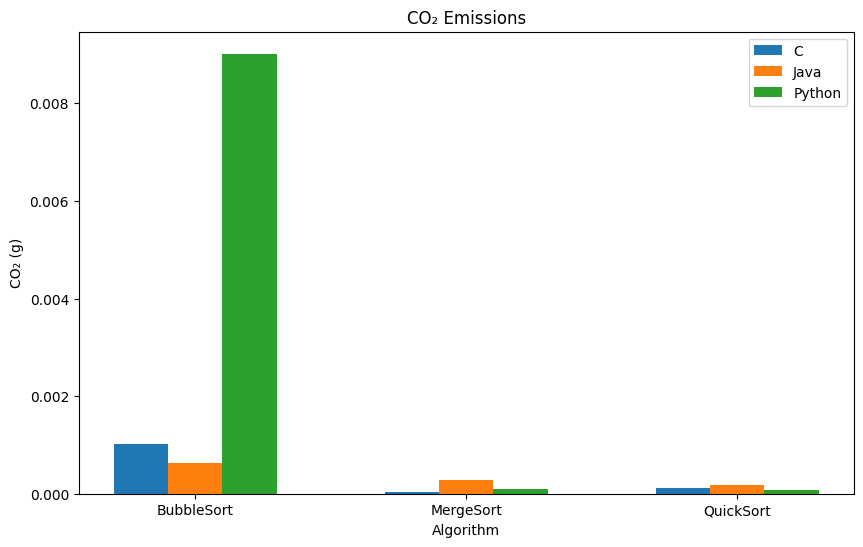

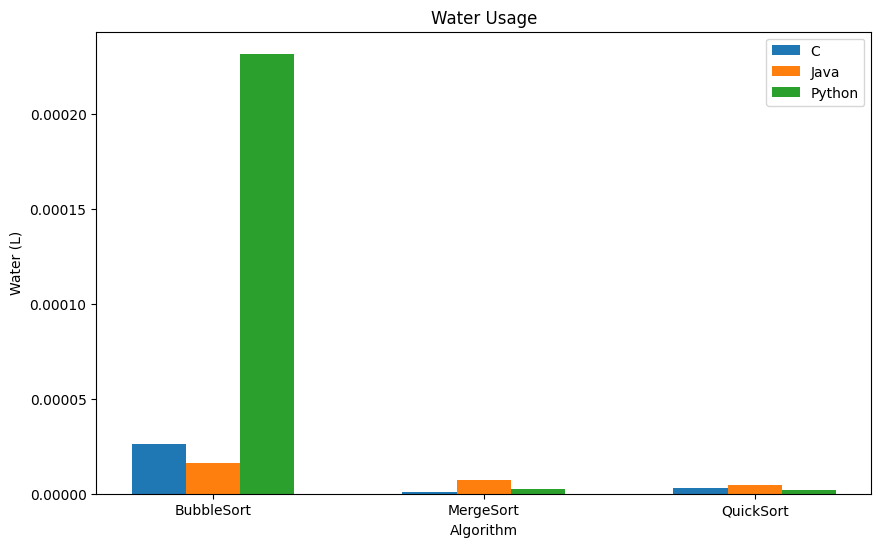

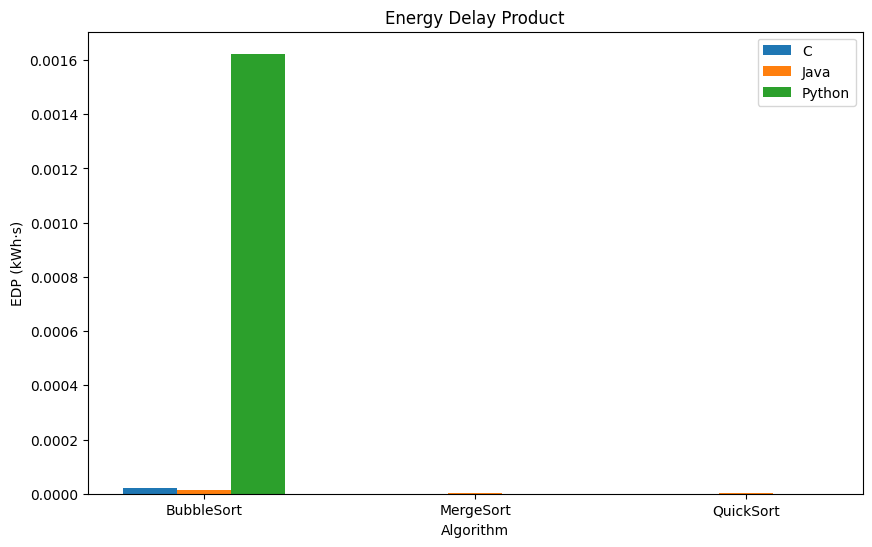

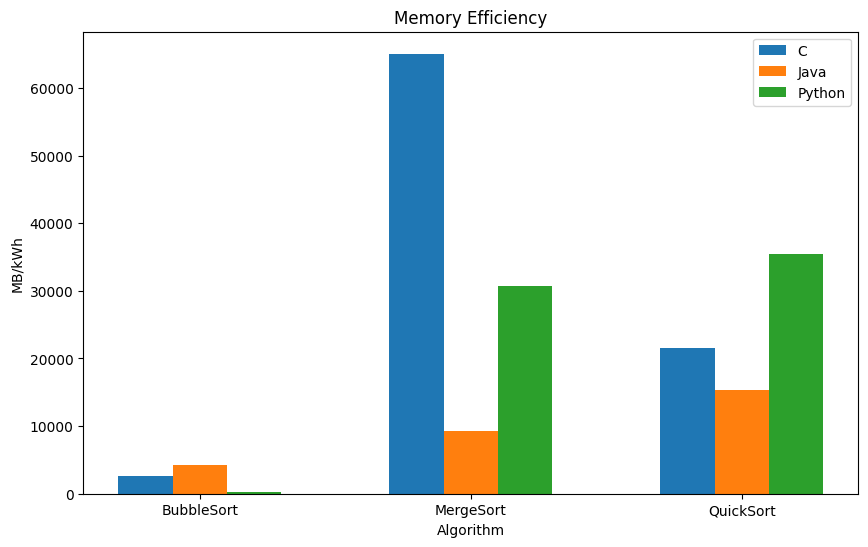

In [12]:
plot_bar_chart(metrics["co2_emissions"], "CO₂ Emissions", "CO₂ (g)")
plot_bar_chart(metrics["water_usage"], "Water Usage", "Water (L)")
plot_bar_chart(metrics["edp"], "Energy Delay Product", "EDP (kWh·s)")
plot_bar_chart(metrics["memory_efficiency"], "Memory Efficiency", "MB/kWh")